# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset

In [2]:
path = r"C:\Users\Ashish Riwal\Downloads\Internship Mentorness\Task 3 Restaurant Rating Prediction\Dataset.csv"
df = pd.read_csv(path)
print((df.head()))

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Step 3: Data Preprocessing

# 3.1 Handling missing Values

In [17]:
# Checking missing Values
print(df.isnull().sum())

# drop rows with missing target values(Aggregate Rating)
df.dropna(subset = ['Aggregate rating'], inplace = True)

# Fill other missing values with a placeholder (e.g., 'Unknown' for categorical, median for numerical)
df['Cuisines'].fillna('Unknown', inplace = True)
df.fillna(df.mode(), inplace = True)

print(df.isnull().sum())  # Verifying no missing values remain

Restaurant ID           0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
                       ..
Price range_1           0
Price range_2           0
Price range_3           0
Price range_4           0
Cost_vs_Rating          0
Length: 173, dtype: int64
Restaurant ID           0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
                       ..
Price range_1           0
Price range_2           0
Price range_3           0
Price range_4           0
Cost_vs_Rating          0
Length: 173, dtype: int64


# 3.2 Convert Categorical Variable

In [4]:
# Encode categorical variables using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
# Label encode the Currency column
df['Currency'] = le.fit_transform(df['Currency'])

# Check the unique values after encoding
print(df['Currency'].unique())

# One-hot encode 'Country Code' and 'Price Range'
df = pd.get_dummies(df, columns=['City','Country Code', 'Price range'])

print(df.head())  # Check the dataframe after encoding


[ 0  1  2  3  4  5  6  7  8  9 10 11]
   Restaurant ID         Restaurant Name  \
0        6317637        Le Petit Souffle   
1        6304287        Izakaya Kikufuji   
2        6300002  Heat - Edsa Shangri-La   
3        6318506                    Ooma   
4        6314302             Sambo Kojin   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude 

In [5]:
# Identify columns with object data type (string)
string_columns = df.select_dtypes(include=['object']).columns
print("Columns with string data types:", string_columns)

Columns with string data types: Index(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Rating color', 'Rating text'],
      dtype='object')


In [6]:
# Columns with string data types
string_columns = df.select_dtypes(include=['object']).columns
print("Columns with string data types:", string_columns)

# Dropping columns that are not useful for prediction
df.drop(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Rating color', 'Rating text'], axis=1, inplace=True)

# Encoding remaining categorical columns (if any)
# Example: Encoding 'Cuisines' using LabelEncoder
le = LabelEncoder()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# Verify no string columns remain
string_columns_after = df.select_dtypes(include=['object']).columns
print("Remaining columns with string data types after processing:", string_columns_after)


Columns with string data types: Index(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Rating color', 'Rating text'],
      dtype='object')
Remaining columns with string data types after processing: Index([], dtype='object')


# 3.3 Normalize/Scale Numerical Features

In [7]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Longitude', 'Latitude', 'Average Cost for two', 'Votes']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())  # Check the dataframe after scaling


   Restaurant ID  Longitude  Latitude  Cuisines  Average Cost for two  \
0        6317637   1.372269 -1.025581       920             -0.006154   
1        6304287   1.371945 -1.026647      1111              0.000049   
2        6300002   1.372975 -1.024131      1671              0.173743   
3        6318506   1.372966 -1.023775      1126              0.018659   
4        6314302   1.372991 -1.023854      1122              0.018659   

   Currency  Has Table booking  Has Online delivery  Is delivering now  \
0         0                  1                    0                  0   
1         0                  1                    0                  0   
2         0                  1                    0                  0   
3         0                  0                    0                  0   
4         0                  1                    0                  0   

   Switch to order menu  ...  Country Code_189  Country Code_191  \
0                     0  ...             False  

# Step 4: Exploratory Data Analysis (EDA)
# 4.1 Descriptive Statistics

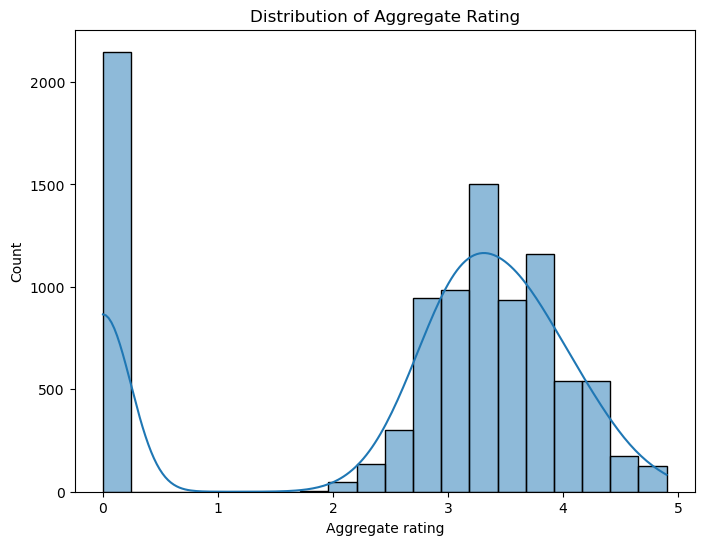

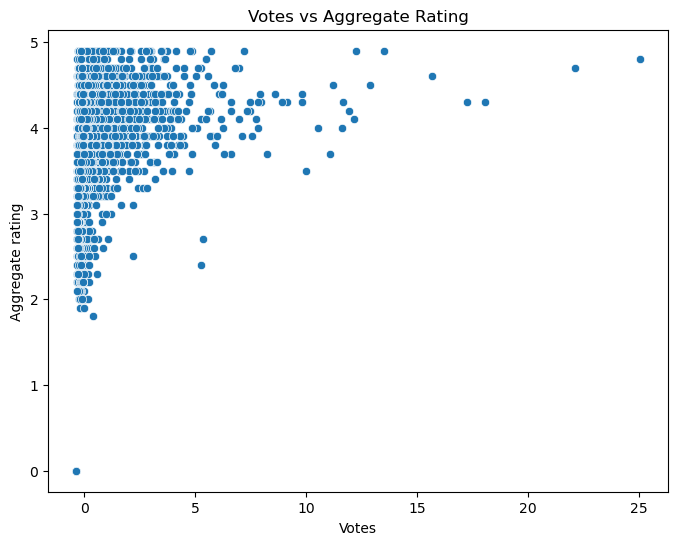

In [8]:
# Distribution of target variable (Aggregate Rating)
plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.show()

# Scatter plot of Votes vs Aggregate Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.show()

# Step 5: Feature Engineering (Optional)

In [9]:
# Example of creating interaction terms (if needed)
df['Cost_vs_Rating'] = df['Average Cost for two'] * df['Aggregate rating']

# Step 6: Model Development
# 6.1 Split the Data

In [10]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = df.drop(['Aggregate rating', 'Restaurant ID'], axis=1)
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


# 6.2 Train Models
# Linear Regression

In [11]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")

Linear Regression Performance:
MAE: 808718.4898618085
MSE: 122915790430328.48
RMSE: 11086739.395797508
R² Score: -54002594319357.83


# Random Forest Regressor

In [12]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Performance:
MAE: 0.07286289900575635
MSE: 0.027840717425431694
RMSE: 0.16685537877285136
R² Score: 0.9877682845839266
